# 5 cell 800 MHz rectangular cavity 

* [PERLE collaboration meeting cavity talk](https://indico.ijclab.in2p3.fr/event/7907/contributions/24619/attachments/18114/23933/Rimmer_ERL_cavity.pdf)
* [PERLE HOM coupler](https://accelconf.web.cern.ch/linac2022/papers/thpojo21.pdf)

Cavity angular frequency $\omega$ as a function of radius $R$
$$ \omega = 2\pi f = \frac{2.405c}{R} $$

So for a $\pi$ mode cavity the distance between two cells is 

$$ l_{\rm cell} = \frac{1}{2f} c$$

For an $n_{\rm cell}$ cavity the total cavity length is then 

$$ l_{\rm cavity} = n_{\rm cell} l_{\rm cell}$$

In [1]:
import numpy as np

def freq_from_radius(radius_m) :
    return 2.405*3e8/radius_m/1e9/2/np.pi

def radius_from_freq(freq_ghz) : 
    return 2.405*3e8/(2*np.pi*freq_ghz*1e9)

def cell_length(freq_ghz) :
    return 1./(freq_ghz*1e9)/2*3e8

In [2]:
rcell = radius_from_freq(0.8)
lcell = cell_length(0.8)
lcav  = 5*lcell
print(f"rcell={rcell:5.3} lcell={lcell:5.3} lcav={lcav:5.3}")

rcell=0.144 lcell=0.188 lcav=0.938


In [3]:
import pyCavity2d
#b_sc = pyCavity2d.DomainLoader.load2d_boundary("pillbox_0.8GHz.dat")
b_sc = pyCavity2d.DomainCreator.make2d_rectangular(cavity_freqnecy_ghz=0.8,
                                                   iris_thickness=0.005,
                                                   iris_radius=0.03)
d_sc = pyCavity2d.Domain2D(b_sc,single_cell=True,maxh=0.01)
fc_sc = pyCavity2d.FieldCalculator(d_sc)
fc_sc.compute(maxit=200)

('zmin', 'default', 'default', 'default', 'default', 'default', 'zmax', 'rmin')
0 -5.428512390563686e-13 freq:  nan MHz
1 284.9258678214173 freq:  805.3910041488222 MHz
2 603.2087357102594 freq:  1171.857073316421 MHz
3 1516.350511745229 freq:  1857.9782925075835 MHz
4 1559.396839443231 freq:  1884.1659859842844 MHz
5 1878.061986807395 freq:  2067.7393648056623 MHz
6 2831.671780791205 freq:  2538.9976037151664 MHz
7 3152.308526797378 freq:  2678.891923696429 MHz
8 3780.5349515879116 freq:  2933.7119057927025 MHz
9 4159.091786535686 freq:  3077.089207484118 MHz


/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  self.eigen_freq.append(c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6)
/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:60: RuntimeWarning: invalid value encountered in sqrt
  print(i, lam, 'freq: ', c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6, "MHz")


In [4]:
fc_sc.draw(1)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Objects': {'Wireframe': True…

In [5]:
import pyCavity2d
import matplotlib.pyplot as _plt
import numpy as _np
b_sc = pyCavity2d.DomainCreator.make2d_rectangular(cavity_freqnecy_ghz=0.8,
                                                   iris_thickness=0.005,
                                                   iris_radius=0.03)
#b_sc = pyCavity2d.DomainLoader.load2d_boundary("pillbox_0.8GHz.dat")
b_mc = pyCavity2d.DomainCreator.make_boundary_repeat(b_sc,5)
d_mc = pyCavity2d.Domain2D(b_mc,single_cell=True,maxh=0.01) #maxh=0.0025)
fc_mc = pyCavity2d.FieldCalculator(d_mc)
fc_mc.compute(maxit=200)

('zmin', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'zmax', 'rmin')
0 -8.408224416652148e-14 freq:  nan MHz
1 282.7879115846282 freq:  802.3636676286031 MHz
2 283.3762350293374 freq:  803.1978689415364 MHz
3 284.10708668544726 freq:  804.2329601289732 MHz
4 284.7006521764479 freq:  805.072636227993 MHz
5 284.92932982258753 freq:  805.3958970989613 MHz
6 598.9185533495025 freq:  1167.6823561947015 MHz
7 600.0919769699348 freq:  1168.8256799212515 MHz
8 601.5694576859489 freq:  1170.26367261115 MHz
9 602.761940985618 freq:  1171.4229975838207 MHz


/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  self.eigen_freq.append(c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6)
/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:60: RuntimeWarning: invalid value encountered in sqrt
  print(i, lam, 'freq: ', c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6, "MHz")


In [6]:
fc_mc.draw(5,field="E")
fc_mc.vtk(5,field="E")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Objects': {'Wireframe': True…

# Comparing field with results from(Bjorkquist and Rosenzweig/Serafini)

Starting with the axial accelerating field $E_z$, the radial electric field $E_r$ and azimuthal magnetic field $B_{\phi}$ are 

$$ E_r = -\frac{1}{2} r \frac{\partial E_z}{\partial z}$$

$$ B_{\phi} = \frac{1}{c^2} \frac{r}{2} \frac{\partial E_z}{\partial t}$$

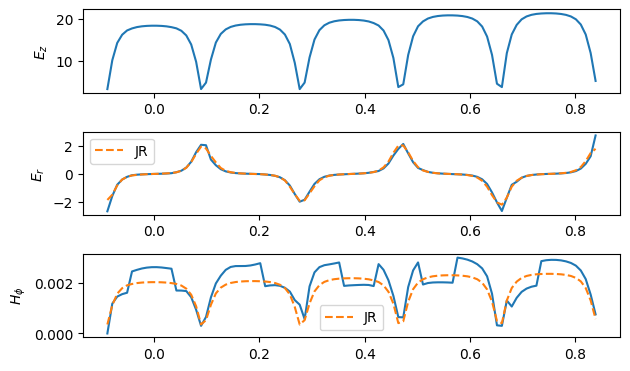

In [7]:
z, e = fc_mc.plotAxialFields(5,field="E")
z, h = fc_mc.plotAxialFields(5,field="H")

_plt.subplot(4,1,1)
_plt.plot(z,_np.abs(e[:,0]))
_plt.ylabel("$E_z$")
_plt.subplot(4,1,2)
_plt.plot(z,e[:,1])
_plt.plot(z,-_np.gradient(e[:,0], z)/2*0.005, label="JR", ls="--")
_plt.ylabel("$E_r$")
_plt.legend()

_plt.subplot(4,1,3)
_plt.plot(z,_np.abs(_np.imag(h[:,0])))
_plt.plot(z,_np.abs(e[:,0])/2/3e8**2*(2*_np.pi*802e6)/(4*_np.pi*1e-7)*0.005, label="JR", ls="--")
_plt.ylabel("$H_{\\phi}$")

_plt.legend()
_plt.tight_layout()

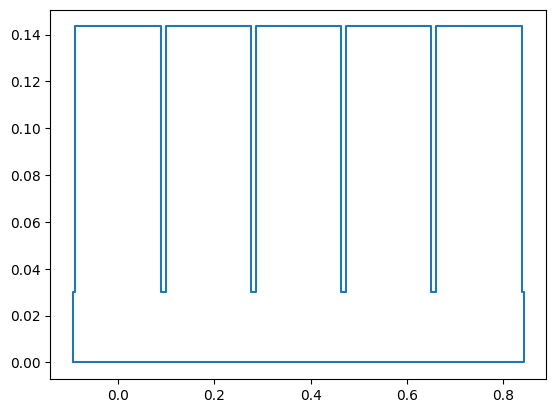

In [1]:
import pyCavity2d
import matplotlib.pyplot as _plt
import numpy as _np
b_sc = pyCavity2d.DomainCreator.make2d_rectangular(cavity_freqnecy_ghz=0.8,
                                                   iris_thickness=0.005,
                                                   iris_radius=0.03)
b_mc = pyCavity2d.DomainCreator.make_boundary_repeat(b_sc,5)
pyCavity2d.DomainWriter.write("test.dat",b_mc)
pyCavity2d.DomainCreator.draw(b_mc)

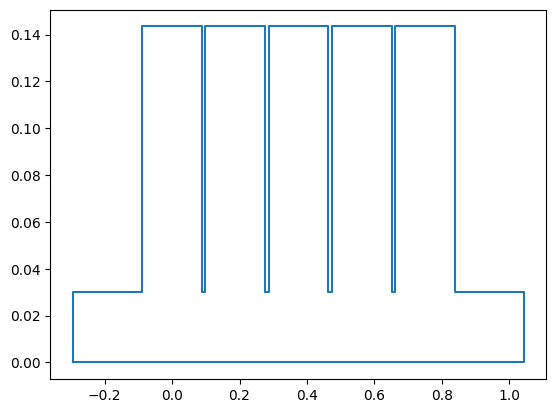

In [8]:
bb  = pyCavity2d.DomainLoader.load2d_boundary("./test.dat")
pyCavity2d.DomainCreator.draw(bb)

In [9]:
b_mc = pyCavity2d.DomainLoader.load2d_boundary("test.dat")
d_mc = pyCavity2d.Domain2D(b_mc,single_cell=True,maxh=0.01) #maxh=0.0025)
fc_mc = pyCavity2d.FieldCalculator(d_mc)
fc_mc.compute(maxit=200)

('zmin', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'default', 'zmax', 'rmin')
0 -2.3656533124212896e-13 freq:  nan MHz
1 282.7223748846702 freq:  802.2706874979642 MHz
2 283.14021169586294 freq:  802.8633085492339 MHz
3 283.7221236948179 freq:  803.6879105903994 MHz
4 284.3239123968871 freq:  804.5397900778679 MHz
5 284.77372272882786 freq:  805.1759435574036 MHz
6 598.7774566648947 freq:  1167.5448034232065 MHz
7 599.6261526564329 freq:  1168.3719385422191 MHz
8 600.7823739953323 freq:  1169.4978450558303 MHz
9 602.069821868643 freq:  1170.7502634009622 MHz


/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:59: RuntimeWarning: invalid value encountered in sqrt
  self.eigen_freq.append(c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6)
/Users/stewart.boogert/Dropbox/Physics/coderepos/pyCavity2d/src/pyCavity2d/FieldCalculator.py:60: RuntimeWarning: invalid value encountered in sqrt
  print(i, lam, 'freq: ', c0 * _np.sqrt(lam) / (2 * _np.pi) * 1e-6, "MHz")


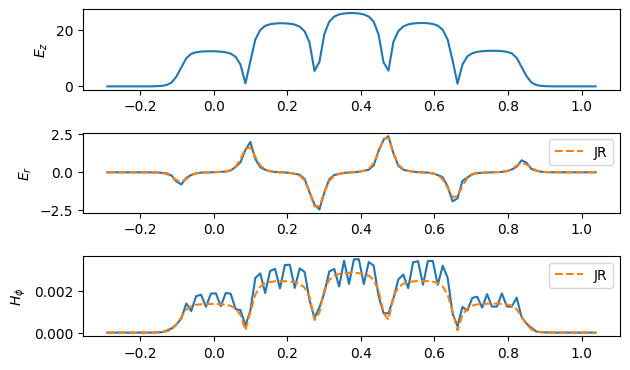

In [10]:
z, e = fc_mc.plotAxialFields(5,field="E")
z, h = fc_mc.plotAxialFields(5,field="H")

_plt.subplot(4,1,1)
_plt.plot(z,_np.abs(e[:,0]))
_plt.ylabel("$E_z$")
_plt.subplot(4,1,2)
_plt.plot(z,e[:,1])
_plt.plot(z,-_np.gradient(e[:,0], z)/2*0.005, label="JR", ls="--")
_plt.ylabel("$E_r$")
_plt.legend()

_plt.subplot(4,1,3)
_plt.plot(z,_np.abs(_np.imag(h[:,0])))
_plt.plot(z,_np.abs(e[:,0])/2/3e8**2*(2*_np.pi*802e6)/(4*_np.pi*1e-7)*0.005, label="JR", ls="--")
_plt.ylabel("$H_{\\phi}$")

_plt.legend()
_plt.tight_layout()

In [17]:
fc_mc.draw(5,field="E")
fc_mc.vtk(5,field="E")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {'Objects': {'Wireframe': True…